In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

"""
Predicting how long a recipe will take to make - regression
Features: n_ingredients, techniques, n_steps
Additinal features: ingredients, n, steps(text), tags(multi hot encoding)

Tasks:
Susana: Data Cleaning
Rocio: EDA | knn & random forest model
Minnie: initial model

Model improvements: all
"""

'\nPredicting how long a recipe will take to make - regression\nFeatures: n_ingredients, techniques, n_steps\nAdditinal features: ingredients, n, steps(text), tags(multi hot encoding)\n\nTasks:\nSusana: Data Cleaning\nRocio: EDA | knn & random forest model\nMinnie: initial model\n\nModel improvements: all\n'

#**Data Loading and Cleaning**

In [ ]:
recipes = pd.read_csv('PP_recipes.csv', on_bad_lines='skip', engine = 'python')

recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [ ]:
raw_recipes = pd.read_csv('RAW_recipes.csv', on_bad_lines='skip', engine = 'python')
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
raw_recipes['minutes']


,minutes
0,55
1,30
2,130
3,45
4,190
...,...
38177,15
38178,7
38179,20
38180,120


In [ ]:
df = raw_recipes[raw_recipes['minutes'] < 240]


Lets take a closer look at the tags in the recipes data and raw_recipes data.

In [ ]:
import ast

recipes["tags_list"] = df["tags"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

tags_series = recipes["tags_list"].explode()

tags_series = tags_series.dropna()

unique_tags = tags_series.unique()

unique_tags = sorted(unique_tags)

print(len(unique_tags), "unique tags")
print(unique_tags)

497 unique tags
['', '1-day-or-more', '15-minutes-or-less', '3-steps-or-less', '30-minutes-or-less', '4-hours-or-less', '5-ingredients-or-less', '60-minutes-or-less', 'a1-sauce', 'african', 'american', 'amish-mennonite', 'angolan', 'appetizers', 'apples', 'april-fools-day', 'argentine', 'artichoke', 'asian', 'asparagus', 'australian', 'austrian', 'avocado', 'bacon', 'baja', 'baking', 'bananas', 'bar-cookies', 'barbecue', 'bass', 'beans', 'bear', 'beef', 'beef-kidney', 'beef-liver', 'beef-organ-meats', 'beef-ribs', 'beef-sausage', 'beginner-cook', 'beijing', 'belgian', 'berries', 'beverages', 'birthday', 'biscotti', 'bisques-cream-soups', 'black-beans', 'blueberries', 'bok-choys', 'brazilian', 'bread-machine', 'breads', 'breakfast', 'breakfast-eggs', 'brewing', 'british-columbian', 'broccoli', 'broil', 'brown-bag', 'brown-rice', 'brownies', 'brunch', 'burgers', 'cajun', 'cake-fillings-and-frostings', 'cakes', 'californian', 'cambodian', 'camping', 'canadian', 'candy', 'canning', 'canton

Specifically, we want to look at the tags that have and don't have numbers, as some tags may tell us how long a recipe takes, such as "30 minutes or less".

In [ ]:
import pandas as pd

# suppose unique_tags is your list
unique_tags = pd.Series(unique_tags)

has_number = unique_tags[unique_tags.str.contains(r'\d', regex=True, na=False)]
no_numbers = unique_tags[~unique_tags.str.contains(r'\d', regex=True, na=False)]

hn_df = pd.DataFrame(has_number).reset_index().drop(columns=['index'])

hn_df

,0
0,1-day-or-more
1,15-minutes-or-less
2,3-steps-or-less
3,30-minutes-or-less
4,4-hours-or-less
5,5-ingredients-or-less
6,60-minutes-or-less
7,a1-sauce
8,crusts-pastry-dough-2
9,for-1-or-2


In [ ]:
nn_df = pd.DataFrame(no_numbers).reset_index().drop(columns=['index'])

nn_df

,0
0,
1,african
2,american
3,amish-mennonite
4,angolan
...,...
480,wings
481,winter
482,yams-sweet-potatoes
483,yeast


Now, lets create our final dataframe that we are going to work with. First, we're going to merge the two different datasets to create one dataframe that has all the meta data that we are interested in.

In [ ]:
import re

rr_final = raw_recipes[['id', 'n_steps', 'n_ingredients', 'minutes', 'name', 'tags', 'steps', 'ingredients']].copy()
pp_final = recipes[['id', 'techniques']].copy()

# Clean 'id' column: remove anything that's NOT a digit
pp_final['id'] = pp_final['id'].astype(str).apply(lambda x: re.sub(r'\D', '', x))

# Drop rows where id became empty after cleaning (they were invalid)
pp_final = pp_final[pp_final['id'].apply(len) > 0]

# Convert both to int
rr_final['id'] = rr_final['id'].astype(int)
pp_final['id'] = pp_final['id'].astype(int)

final_recipes = rr_final.merge(pp_final, on='id')
final_recipes


,id,n_steps,n_ingredients,minutes,name,tags,steps,ingredients,techniques
0,137739,11,7,55,arriba baked winter squash mexican style,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,31490,9,6,30,a bit different breakfast pizza,"['30-minutes-or-less', 'time-to-make', 'course...","['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,59389,11,11,45,alouette potatoes,"['60-minutes-or-less', 'time-to-make', 'course...",['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,75452,12,9,70,beat this banana bread,"['weeknight', 'time-to-make', 'course', 'main-...","['preheat oven to 350 degrees', 'butter two 9x...","['sugar', 'unsalted butter', 'bananas', 'eggs'...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,42198,8,7,1460,better than sex strawberries,"['weeknight', 'time-to-make', 'course', 'main-...",['crush vanilla wafers into fine crumbs and li...,"['vanilla wafers', 'butter', 'powdered sugar',...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...
11517,266655,12,16,105,ceviche verde,"['time-to-make', 'course', 'main-ingredient', ...","['put the raw mahi-mahi into a tall , narrow g...","['fish fillet', 'lime juice', 'salt', 'dried o...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
11518,200850,5,14,70,ceylon beef curry,"['curries', 'time-to-make', 'course', 'main-in...",['put the coriander and cumin into a dry fryin...,"['ground coriander', 'ground cumin', 'stewing ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11519,230624,7,16,50,ceylon chicken curry 1,"['curries', '60-minutes-or-less', 'time-to-mak...","['grind the ginger and garlic to a paste', 'mi...","['chicken breasts', 'onion', 'green chilies', ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11520,137516,15,9,30,chvre au coulis de framboises,"['30-minutes-or-less', 'time-to-make', 'course...","['put the bread crumbs , sugar and pine nuts i...","['goat cheese', 'white bread', 'sugar', 'pine ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Next, we need to parse through all of the tags and remove any tags that won't be that relevant, such as region tags, holiday tags, or miscellenous tags.

The reason why we remove these is because they aren't weighted heavily on the length of how long a recipe takes and only add more noise to the linear model. We also chose to remove any tags that listed the time due to the data leakage.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

df = final_recipes.copy()

region_tags = {
    'american', 'asian', 'australian','amish-mennonite', 'angolan', 'austrian', 'belgian', 'brazilian',
    'british-columbian', 'canadian', 'cantonese', 'caribbean', 'chinese',
    'chilean', 'cuban', 'danish', 'dutch', 'english', 'ethiopian', 'finnish',
    'french', 'german', 'greek', 'hungarian', 'icelandic', 'indian',
    'indonesian', 'iranian-persian', 'irish', 'italian', 'japanese',
    'jewish-ashkenazi', 'jewish-sephardi', 'korean', 'laotian', 'lebanese',
    'malaysian', 'mexican', 'moroccan', 'norwegian', 'polish', 'portuguese',
    'russian', 'scandinavian', 'scottish', 'somalian', 'spanish', 'swedish',
    'thai', 'turkish', 'vietnamese', 'african', 'argentine', 'cajun',
    'central-american', 'south-american', 'midwestern', 'middle-eastern',
    'pakistani', 'peruvian', 'philippine', 'north-american', 'beijing', 'californian',
    'cambodian', 'colombian', 'creole', 'czech', 'costa-rican', 'ecuadorean', 'egyptian',
    'filipino', 'georgian', 'guatemalan', 'hawaiian', 'hunan', 'honduran', 'iraqi',
    'micro-melanesia', 'mongolian', 'namibian', 'native-american', 'nepalese', 'new-zealand', 'nigerian',
    'north-eastern-united-states', 'oaxacan', 'palestinian', 'ontario', 'polynesian',
    'puerto-rican', 'quebec', 'saudi-arabian', 'south-african', 'south-west-pacific', 'southern-united-states',
    'southwestern-united-states', 'st-patricks-day', 'sudanese', '	szechuan', 'tex-mex', 'venezuelan', 'welsh'

}

holiday_tags = {
    'christmas', 'thanksgiving', 'halloween', 'easter', 'hanukkah',
    'valentines-day', 'mothers-day', 'fathers-day', 'kwanzaa',
    'new-years', 'ramadan', 'rosh-hashana', 'rosh-hashanah',
    'super-bowl', 'superbowl', 'memorial-day', 'labor-day',
    'independence-day', 'cinco-de-mayo', 'april-fools-day',
    'birthday', 'wedding', 'chinese-new-year', 'holiday-event', 'irish-st-patricks-day',
    'mardi-gras-carnival'
}

misc_tags = {
    'bear'
}

time_tags = {
    '1-day-or-more', '15-minutes-or-less', '30-minutes-or-less',
'4-hours-or-less', '60-minutes-or-less'
}

drop_tags = time_tags


def parse_tags(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        try:
            parsed = ast.literal_eval(x)
            if isinstance(parsed, list):
                return parsed
            # fallback if literal_eval returns a string
            return [parsed]
        except:
            # fallback: split on commas (best-effort)
            return [s.strip().strip("'\"") for s in x.split(',') if s.strip()]
    return []

df["tags"] = df["tags"].apply(parse_tags)

df["tags"] = df["tags"].apply(lambda tag_list: [t for t in tag_list if t not in drop_tags])
df = df[df["tags"].apply(len) > 0].reset_index(drop=True)


df = df.reset_index(drop=True)

mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(df["tags"])

tag_features = pd.DataFrame(tag_matrix, columns=mlb.classes_, index=df.index)


final_model_df = pd.concat([df.drop(columns=["tags"]), tag_features], axis=1)

rf_df = final_model_df
final_model_df.head()


,id,n_steps,n_ingredients,minutes,name,steps,ingredients,techniques,,3-steps-or-less,...,whitefish,whole-chicken,whole-duck,whole-turkey,wild-game,wings,winter,yams-sweet-potatoes,yeast,zucchini
0,137739,11,7,55,arriba baked winter squash mexican style,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,...,0,0,0,0,0,0,1,0,0,0
1,31490,9,6,30,a bit different breakfast pizza,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,...,0,0,0,0,0,0,0,0,0,0
2,59389,11,11,45,alouette potatoes,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,0,...,0,0,0,0,0,0,0,0,0,0
3,75452,12,9,70,beat this banana bread,"['preheat oven to 350 degrees', 'butter two 9x...","['sugar', 'unsalted butter', 'bananas', 'eggs'...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,...,0,0,0,0,0,0,0,0,0,0
4,42198,8,7,1460,better than sex strawberries,['crush vanilla wafers into fine crumbs and li...,"['vanilla wafers', 'butter', 'powdered sugar',...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0,0,...,0,0,0,0,0,0,0,0,0,0


# **Exploratory Data Analysis (EDA)**

Our established dataset is as follows, We'll explore the relationships between features and understand our data better.

### **Basic Information**

Displaying shape, columns, and summary statistics (mean, std, min, max, quartiles) for all numeric features to understand their ranges and distributions.

In [ ]:
df_before_filter = final_model_df
print("Dataset Shape:", df_before_filter .shape)
print("\nColumns:\n", df_before_filter .columns)
print("\nData Types:\n", df_before_filter .dtypes)
print("\nSummary statistics:\n", df_before_filter ['minutes'].describe())

Dataset Shape: (11522, 477)

Columns:
 Index(['id', 'n_steps', 'n_ingredients', 'minutes', 'name', 'steps',
       'ingredients', 'techniques', '', '3-steps-or-less',
       ...
       'whitefish', 'whole-chicken', 'whole-duck', 'whole-turkey', 'wild-game',
       'wings', 'winter', 'yams-sweet-potatoes', 'yeast', 'zucchini'],
      dtype='object', length=477)

Data Types:
 id                      int64
n_steps                 int64
n_ingredients           int64
minutes                 int64
name                   object
                        ...  
wings                   int64
winter                  int64
yams-sweet-potatoes     int64
yeast                   int64
zucchini                int64
Length: 477, dtype: object

Summary statistics:
 count     11522.000000
mean        113.968061
std        1631.898000
min           0.000000
25%          20.000000
50%          40.000000
75%          65.000000
max      129615.000000
Name: minutes, dtype: float64


Since the mean is much larger than the median (364 > 40), there seems to be a highly skewed right data for 'minutes'. So, we will use IQR to get rid of all the outliers from the dataset: 40 + (75-20)*3 = 240

In [ ]:
df = df_before_filter [df_before_filter ['minutes'] < 240]
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nSummary statistics:\n", df['minutes'].describe())

Dataset Shape: (10984, 477)

Columns:
 Index(['id', 'n_steps', 'n_ingredients', 'minutes', 'name', 'steps',
       'ingredients', 'techniques', '', '3-steps-or-less',
       ...
       'whitefish', 'whole-chicken', 'whole-duck', 'whole-turkey', 'wild-game',
       'wings', 'winter', 'yams-sweet-potatoes', 'yeast', 'zucchini'],
      dtype='object', length=477)

Data Types:
 id                      int64
n_steps                 int64
n_ingredients           int64
minutes                 int64
name                   object
                        ...  
wings                   int64
winter                  int64
yams-sweet-potatoes     int64
yeast                   int64
zucchini                int64
Length: 477, dtype: object

Summary statistics:
 count    10984.000000
mean        45.619173
std         36.778533
min          0.000000
25%         20.000000
50%         35.000000
75%         60.000000
max        235.000000
Name: minutes, dtype: float64


### **Visualization**

Visualizing the distribution of the target variable 'minutes' to understand whether it’s skewed or normally distributed. Let's look at our 'minutes' before we filtered.

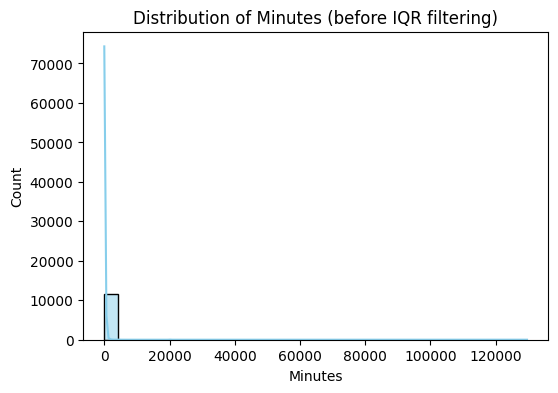

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df_before_filter ["minutes"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Minutes (before IQR filtering)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

Now, let's look at it after it got filtered.

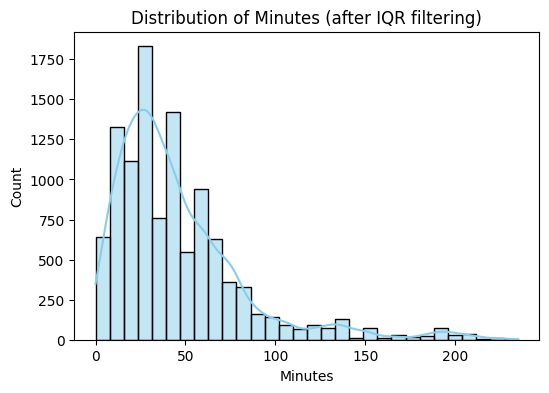

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["minutes"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Minutes (after IQR filtering)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()



*   So much better! However, it still seems to be a **highly right skewed distrbution** for minutes, so we'll keep that in mind.



Now, we will calculate the correlation matrix for the numerical features to understand the relationships between variables, and display the correlations (both regular and absolute) with 'minutes'.

In [ ]:
num_df = df.select_dtypes(include=[np.number])

corr_matrix = num_df.corr()
abs_corr_matrix = num_df.corr().abs()

corr_with_minutes = corr_matrix["minutes"].sort_values(ascending=False).head(100)
abs_corr_with_minutes = abs_corr_matrix["minutes"].sort_values(ascending=False).head(100)

print('Regular Correlation')
display(corr_with_minutes)
print('Absolute Correlation')
display(abs_corr_with_minutes)

Regular Correlation


,minutes
minutes,1.000000
n_steps,0.258227
n_ingredients,0.256129
weeknight,0.232286
yeast,0.187888
...,...
chicken-livers,0.021789
stocks,0.021646
brown-rice,0.021514
native-american,0.021449


Absolute Correlation


,minutes
minutes,1.000000
n_steps,0.258227
n_ingredients,0.256129
weeknight,0.232286
for-1-or-2,0.201376
...,...
savory-pies,0.039887
pork-loins,0.039651
whole-duck,0.038758
sauces,0.037991


In [ ]:
top_100_features = abs_corr_with_minutes.drop("minutes").head(100).index.tolist()
top_25_features = abs_corr_with_minutes.drop("minutes").head(25).index.tolist()
top_10_features = abs_corr_with_minutes.drop("minutes").head(10).index.tolist()

df_top100 = num_df[top_100_features + ["minutes"]]
df_top25 = num_df[top_25_features + ["minutes"]]
df_top10 = num_df[top_10_features + ["minutes"]]

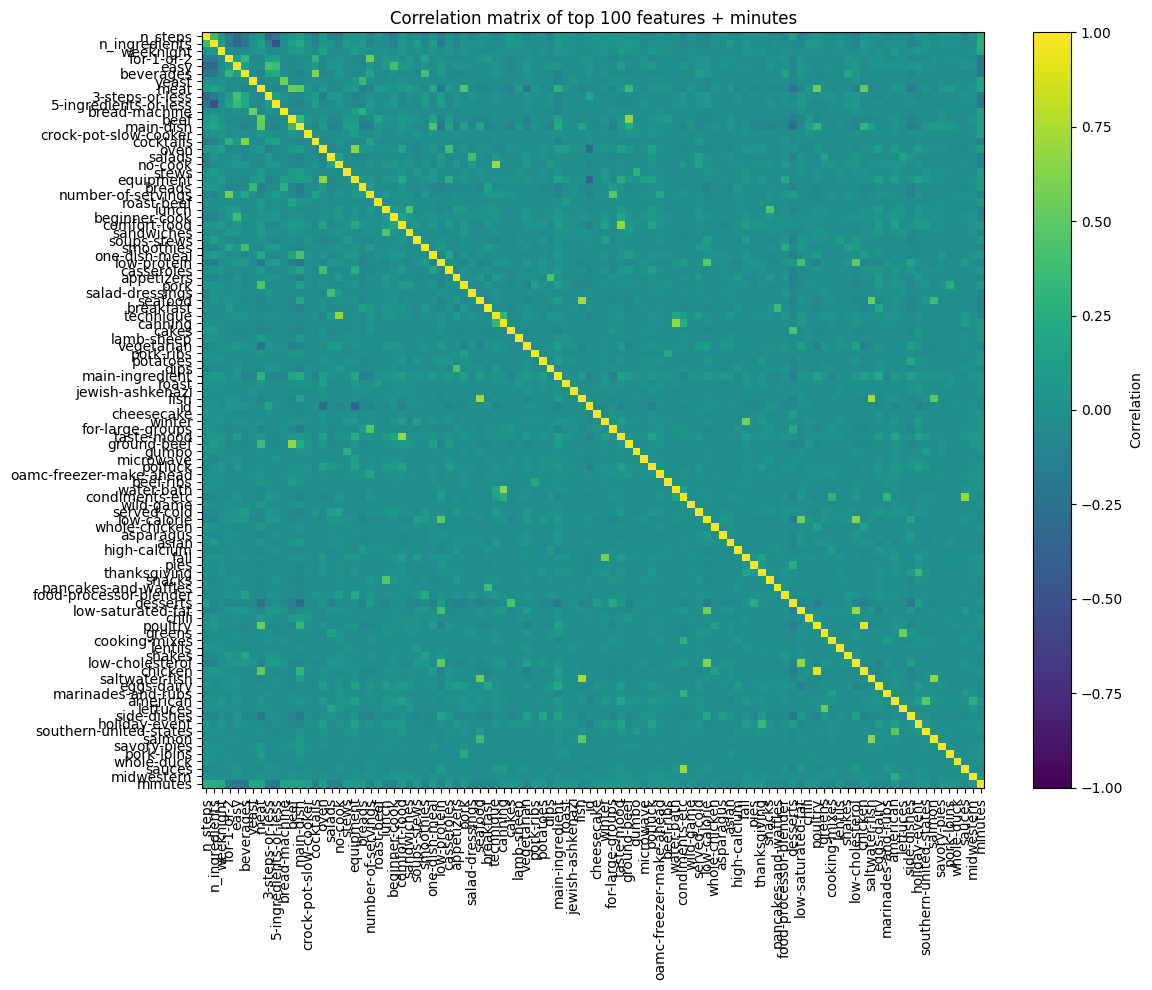

In [ ]:
top100_corr_matrix = df_top100.corr()
cols_100 = top100_corr_matrix.columns

plt.figure(figsize=(12, 10))
plt.imshow(top100_corr_matrix, vmin=-1, vmax=1, aspect="auto"                       )
plt.colorbar(label="Correlation")
plt.xticks(range(len(cols_100)), cols_100, rotation=90)
plt.yticks(range(len(cols_100)), cols_100)
plt.title("Correlation matrix of top 100 features + minutes")
plt.tight_layout()
plt.show()

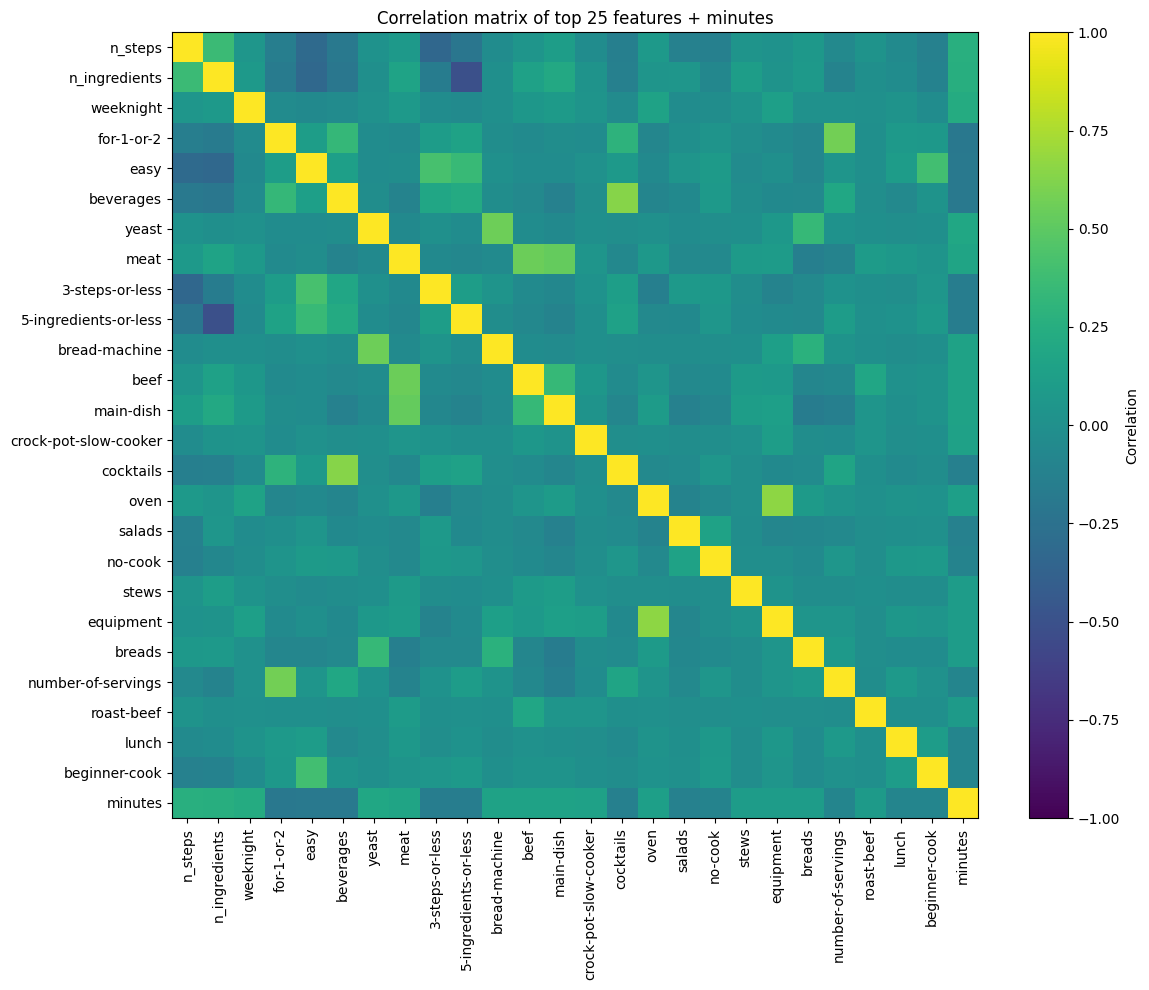

In [ ]:
top25_corr_matrix = df_top25.corr()
cols_25 = top25_corr_matrix.columns

plt.figure(figsize=(12, 10))
plt.imshow(top25_corr_matrix, vmin=-1, vmax=1, aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(cols_25)), cols_25, rotation=90)
plt.yticks(range(len(cols_25)), cols_25)
plt.title("Correlation matrix of top 25 features + minutes")
plt.tight_layout()
plt.show()

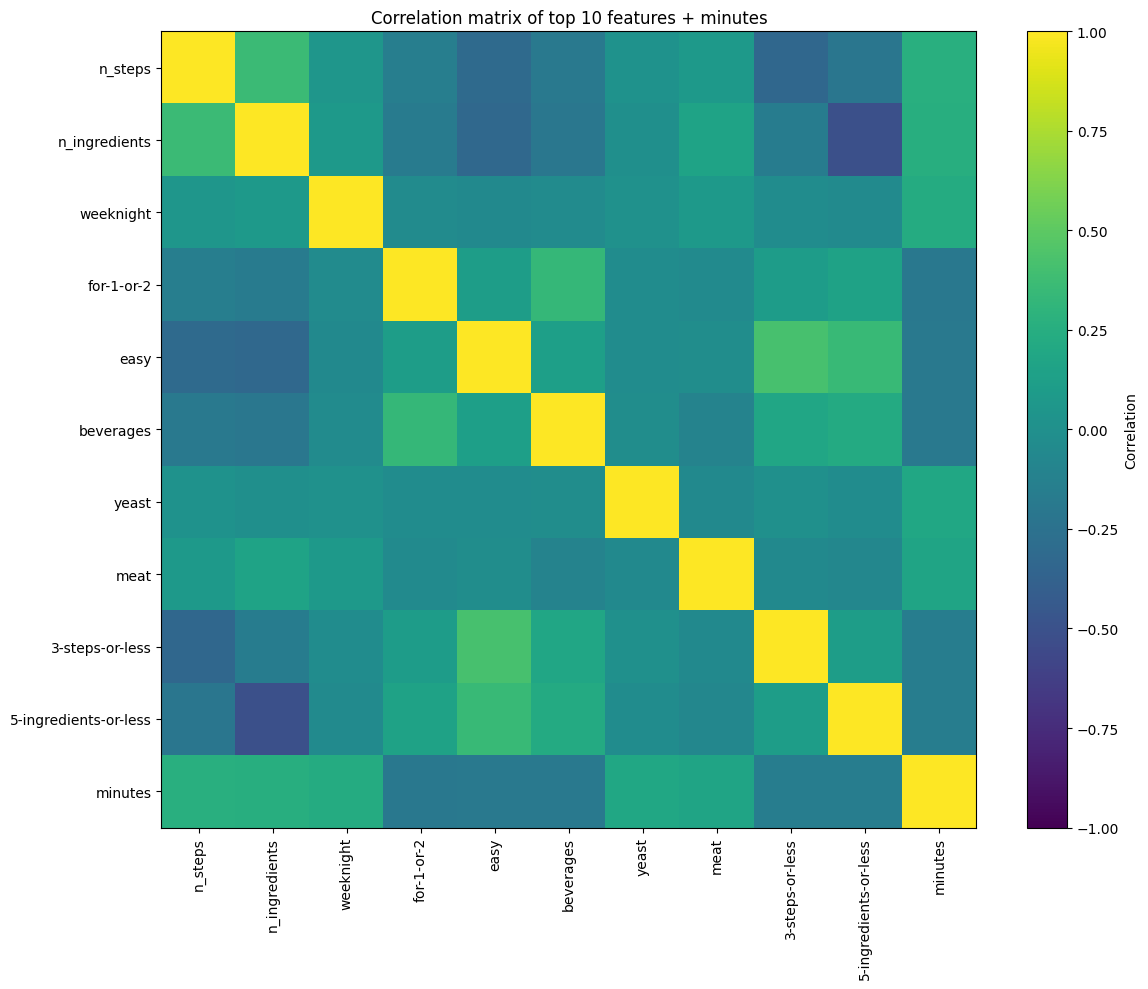

In [ ]:
top10_corr_matrix = df_top10.corr()
cols_10 = top10_corr_matrix.columns

plt.figure(figsize=(12, 10))
plt.imshow(top10_corr_matrix, vmin=-1, vmax=1, aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(cols_10)), cols_10, rotation=90)
plt.yticks(range(len(cols_10)), cols_10)
plt.title("Correlation matrix of top 10 features + minutes")
plt.tight_layout()
plt.show()

Now, let's create side-by-side scatter plots with regression lines for each feature to visualize the relationship between 'minutes' and the features.

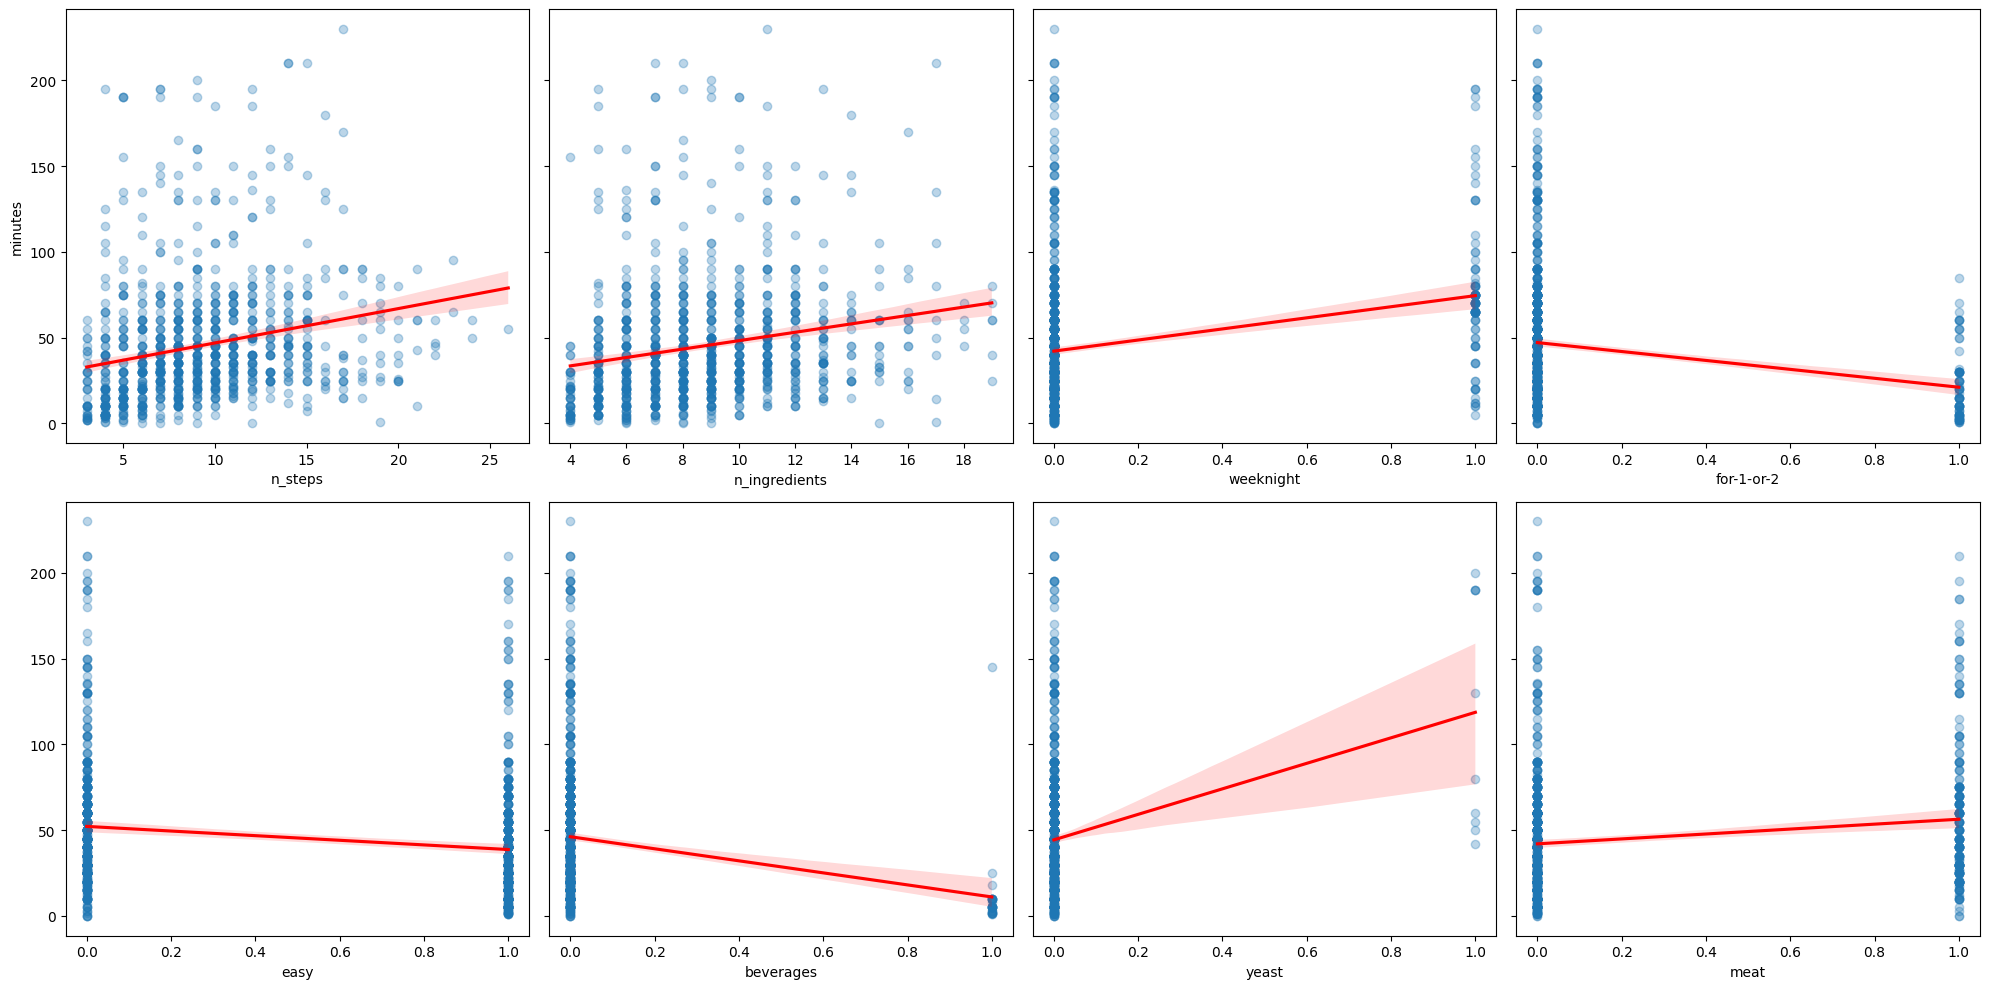

In [ ]:
sub = num_df.sample(n=1000, random_state=42)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for i, feature in enumerate(top_100_features[:8]):
    sns.regplot(x=feature, y='minutes', data=sub, ax=axes[i], scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('minutes' if i == 0 else '')

plt.tight_layout()
plt.show()

# **Modeling:**

## **Regression Modeling**

Now that we’ve explored the data, we will start on data modeling!

### **Model #1: Baseline**

This is a baseline linear regression model using only number of steps and number of ingredients.

 As the basal assumption is that the number of steps and ingredients has a positive linear relationship with the recipe time, we started with a simple linear regression model.

In [ ]:
import numpy as np
import pandas as pd
import ast
import re

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df_filtered = df[df["minutes"] < 240].copy()

X_numeric = df_filtered[["n_steps", "n_ingredients"]].values

y = df_filtered["minutes"].values

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

baseline_model = Ridge(alpha=1.0)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n===== Baseline Linear Model =====")
print(f"Baseline R²:   {r2:.4f}")
print(f"Baseline RMSE: {rmse:.4f}")



===== Baseline Linear Model =====
Baseline R²:   0.0737
Baseline RMSE: 35.7202


### **Model #2: Ridge Regression of the Baseline**

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold
import numpy as np

X = df_filtered[["n_steps", "n_ingredients"]].values
y = df_filtered["minutes"].values
# -----------------------------------------
# 1. Scale features (same as before)
# -----------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------
# 2. Train/Test split (same as before)
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------------------
# 3. Ridge with cross-validated alpha
# -----------------------------------------
alphas = np.logspace(-3, 5, 50)  # wide search space

ridge = RidgeCV(alphas=alphas, scoring="r2", cv=5)
ridge.fit(X_train, y_train)

print("Best alpha:", ridge.alpha_)

# -----------------------------------------
# 4. Test performance
# -----------------------------------------
y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n===== Ridge Regression (CV tuned) =====")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# -----------------------------------------
# 5. 5-fold CV score (optional)
# -----------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    Ridge(alpha=ridge.alpha_), X_scaled, y, scoring="r2", cv=kf
)

print("\nCV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


Best alpha: 115.13953993264457

===== Ridge Regression (CV tuned) =====
RMSE: 35.7153
R²: 0.0740

CV R² scores: [0.07398378 0.10835196 0.12149198 0.10007443 0.07450421]
Mean CV R²: 0.09568127086488569


Here, we see that Ridge Regression did not work in improving the model, returning the same RMSE and R^2 values as the baseline did. Next, rather than changing the model, we add more features in instead.

### **Model #2: Multiple Linear Regression with Shrunken Text Features**

In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# -----------------------------------------
# 1. Filter df
# -----------------------------------------
df_filtered = df[df["minutes"] < 240].copy()

# -----------------------------------------
# 2. Make sure tag_features matches filtered df
# -----------------------------------------
tag_features_filtered = tag_features.loc[df_filtered.index]

# -----------------------------------------
# 3. Parse techniques
# -----------------------------------------
df_filtered["techniques"] = df_filtered["techniques"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
tech = np.vstack(df_filtered["techniques"].values)

# -----------------------------------------
# 4. Create EXTRA numeric features
# -----------------------------------------
df_filtered["steps_text"] = df_filtered["steps"].apply(lambda lst: " ".join(lst).lower())
df_filtered["steps_word_count"] = df_filtered["steps_text"].apply(lambda x: len(x.split()))
df_filtered["steps_char_count"] = df_filtered["steps_text"].apply(lambda x: len(x))
df_filtered["steps_unique_words"] = df_filtered["steps_text"].apply(lambda x: len(set(x.split())))

df_filtered["ingredients_text"] = df_filtered["ingredients"].apply(lambda lst: " ".join(lst).lower())
df_filtered["ingredients_word_count"] = df_filtered["ingredients_text"].apply(lambda x: len(x.split()))
df_filtered["ingredients_char_count"] = df_filtered["ingredients_text"].apply(lambda x: len(x))
df_filtered["ingredients_unique_words"] = df_filtered["ingredients_text"].apply(lambda x: len(set(x.split())))

# -----------------------------------------
# 5. Add shrunken mean for n_steps and n_ingredients
# -----------------------------------------
def shrunken_mean(col, lam=0.2):
    mu = col.mean()
    return lam * mu + (1 - lam) * col

df_filtered["n_steps_shrunk"] = shrunken_mean(df_filtered["n_steps"], lam=0.2)
df_filtered["n_ing_shrunk"] = shrunken_mean(df_filtered["n_ingredients"], lam=0.2)

# -----------------------------------------
# 6. Collect ALL numeric features
# -----------------------------------------
numeric = df_filtered[
    [
        "n_steps_shrunk",
        "n_ing_shrunk",
        "steps_word_count",
        "steps_char_count",
        "steps_unique_words",
        "ingredients_word_count",
        "ingredients_char_count",
        "ingredients_unique_words",
    ]
].values

# -----------------------------------------
# 7. Tag features + technique features
# -----------------------------------------
tags_array = tag_features_filtered.values

X = np.hstack([numeric, tech, tags_array])
y = df_filtered["minutes"].values

print("X shape:", X.shape)
print("y shape:", y.shape)

# -----------------------------------------
# 8. Scaling + Train/Test
# -----------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------------------
# 9. Fit Linear Regression
# -----------------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== Linear Regression (with shrinkage) =====")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# -----------------------------------------
# 10. Cross-validation
# -----------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X_scaled, y, scoring='r2', cv=kf)

print("\nCV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

X shape: (10984, 535)
y shape: (10984,)
===== Linear Regression (with shrinkage) =====
RMSE: 29.0176
R²: 0.3887

CV R² scores: [0.38872843 0.32105904 0.32140657 0.37493179 0.31846826]
Mean CV R²: 0.34491881611940833


### **Model #3: Multiple Linear Regression with Ingredient Features**

In [ ]:
import numpy as np
import pandas as pd
import ast
import re

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# ======================
# 0. CLEAN FILTERING
# ======================
df_filtered_nan = df[df['minutes'] < 120].copy()
df_filtered = df_filtered_nan.dropna()

# Parse techniques from string to list
df_filtered["techniques"] = df_filtered["techniques"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# ======================
# 1. TECHNIQUE FEATURES
# ======================
tech = np.vstack(df_filtered["techniques"].values)
df_filtered["technique_count"] = df_filtered["techniques"].apply(len)

# ======================
# 2. NUMERIC FEATURES
# ======================
numeric = df_filtered[["n_steps", "n_ingredients"]].values

# Engineered numeric features
df_filtered["ingredient_step_ratio"] = df_filtered["n_ingredients"] / (df_filtered["n_steps"] + 1)
df_filtered["prep_complexity"] = (df_filtered["n_steps"]**1.2) * (df_filtered["n_ingredients"]**0.8)

# Interaction terms
df_filtered["steps_x_ingredients"] = df_filtered["n_steps"] * df_filtered["n_ingredients"]

numeric_eng = df_filtered[[
    "ingredient_step_ratio",
    "prep_complexity",
    "technique_count",
    "steps_x_ingredients"
]].values

# ======================
# 3. TAG FEATURES
# ======================
tag_features_filtered = tag_features.loc[df_filtered.index]
tags_array = tag_features_filtered.values

# ======================
# 4. TEXT FEATURE
# ======================
def has_slow_word(name):
    slow_words = r"(slow|braise|stew|roast|smoke|pressure cook|marinate)"
    return int(bool(re.search(slow_words, name, flags=re.IGNORECASE)))

df_filtered["has_slow_word"] = df_filtered["name"].apply(has_slow_word)
text_features = df_filtered[["has_slow_word"]].values

# ======================
# 5. INGREDIENT-BASED FEATURES
# ======================
df_filtered["ingredients"] = df_filtered["ingredients"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
df_filtered["ingredient_words"] = df_filtered["ingredients"].apply(lambda lst: " ".join(lst))

# Counts & complexity
df_filtered["ingredient_count"] = df_filtered["ingredients"].apply(len)
# Type-based signals
def has_any(text, words):
    return int(bool(re.search("|".join(words), text, flags=re.IGNORECASE)))

df_filtered["has_meat"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, ["chicken","beef","pork","lamb","sausage","shrimp", "fish"]))
df_filtered["has_rice"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, [" rice"]))
df_filtered["has_potatoes"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, ["potato"]))
df_filtered["has_squash"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, ["squash"]))
df_filtered["has_bread"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, ["bread", "toast", "bun", "loaf", "baguette"]))
df_filtered["has_dairy"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, ['milk', 'cheese', 'yogurt', 'ice cream', 'cream', 'dairy']))
df_filtered["has_tortilla_or_crust"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, ["tortilla","crust","prepared","instant","cooked"]))
df_filtered["has_processed"] = df_filtered["ingredient_words"].apply(lambda x: has_any(x, ["prepared","instant","box","canned","frozen"]))

df_filtered["slow_x_meat"] = df_filtered["has_slow_word"] * df_filtered["has_meat"]
df_filtered["slow_x_processed"] = df_filtered["has_slow_word"] * df_filtered["has_processed"]


ingredient_features = df_filtered[[
    "ingredient_count",
    "has_meat",
    "has_rice",
    "has_potatoes",
    "has_squash",
    "has_tortilla_or_crust",
    "has_processed",
    "has_dairy",
    "has_bread",
    "slow_x_meat",
    "slow_x_processed"
]].values

df_filtered["has_quick"] = df_filtered["name"].apply(lambda x: int(bool(re.search(r"\b(quick|easy|fast)\b", x, flags=re.IGNORECASE))))
df_filtered["has_instant"] = df_filtered["name"].apply(lambda x: int(bool(re.search(r"\b(instant|ready)\b", x, flags=re.IGNORECASE))))
df_filtered["uses_oven"] = df_filtered["name"].apply(lambda x: int(bool(re.search(r"\b(bake|roast|broil|grill)\b", x, flags=re.IGNORECASE))))
df_filtered["uses_stovetop"] = df_filtered["name"].apply(lambda x: int(bool(re.search(r"\b(fry|sauté|simmer|stew|boil)\b", x, flags=re.IGNORECASE))))
df_filtered["num_high_cook_ingredients"] = df_filtered[["has_meat","has_potatoes","has_squash"]].sum(axis=1)
df_filtered["num_processed_ingredients"] = df_filtered[["has_processed","has_tortilla_or_crust"]].sum(axis=1)

misc_feats = df_filtered[['has_quick', 'has_instant', 'uses_oven', 'uses_stovetop',
                          'num_high_cook_ingredients', 'num_processed_ingredients']].values

# ======================
# 6. COMBINE ALL FEATURES
# ======================
X = np.hstack([numeric, numeric_eng, tech, tags_array, text_features, ingredient_features, misc_feats])
y = df_filtered["minutes"].values

print("X shape:", X.shape)
print("y shape:", y.shape)

# ======================
# 7. SCALE, SPLIT, AND MODEL
# ======================
num_cols = numeric.shape[1] + numeric_eng.shape[1]
X_num = X[:, :num_cols]
X_other = X[:, num_cols:]

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_final = np.hstack([X_num_scaled, X_other])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# Ridge regression
lr = Ridge(alpha=1, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== Linear Regression + Ingredient Features =====")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X_final, y, scoring='r2', cv=kf)

print("\nCross-validation R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())



X shape: (10362, 551)
y shape: (10362,)
===== Linear Regression + Ingredient Features =====
RMSE: 17.9049
R²: 0.4592

Cross-validation R² scores: [0.45921806 0.47812419 0.45491011 0.44300111 0.42857449]
Mean CV R²: 0.45276559428613317


## **Trying Many Models**

We see that linear models have improved from the baseline with additional features and feature engineering, but what if we tried using a more complex model such as Random Forest Regression or Gradient Boosting?

In [ ]:
import numpy as np
import pandas as pd
import ast
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = final_model_df.copy()
df = df[df["minutes"] < 240].dropna(subset=["minutes", "n_steps", "n_ingredients", "techniques"])

# -------------------------------------------------
# 1. MAKE SURE "techniques" IS A LIST OF 0/1 AND EXPAND
# -------------------------------------------------
if isinstance(df["techniques"].iloc[0], str):
    df["techniques"] = df["techniques"].apply(ast.literal_eval)

tech_arr = np.vstack(df["techniques"].values).astype(int)
tech_cols = [f"tech_{i}" for i in range(tech_arr.shape[1])]
df_tech = pd.DataFrame(tech_arr, columns=tech_cols, index=df.index)

# replace list column with expanded numeric ones
df = pd.concat([df.drop(columns=["techniques"]), df_tech], axis=1)

# -------------------------------------------------
# 2. ENGINEERED NUMERIC FEATURES (NO LEAKAGE FROM MINUTES)
# -------------------------------------------------
df["ingredient_step_ratio"] = df["n_ingredients"] / (df["n_steps"] + 1)
df["log_steps"] = np.log1p(df["n_steps"])
df["log_ingredients"] = np.log1p(df["n_ingredients"])
df["prep_complexity"] = (df["n_steps"] ** 1.2) * (df["n_ingredients"] ** 0.8)

def has_slow_word(name):
    slow_words = r"(slow|braise|stew|roast|smoke)"
    return int(bool(re.search(slow_words, str(name), flags=re.IGNORECASE)))

df["has_slow_word"] = df["name"].apply(has_slow_word)

# -------------------------------------------------
# 3. DROP TEXT / LIST COLUMNS WE DON'T USE DIRECTLY
# -------------------------------------------------
cols_to_drop = ["name", "steps", "ingredients"]
for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

# -------------------------------------------------
# 4. BUILD X, y
#    - all numeric columns except 'minutes' and 'id'
#    - also drop tag columns that mention 'minute' to avoid label leakage
# -------------------------------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

feature_cols = [c for c in num_cols if c not in ["minutes", "id"]]

# remove tag columns like '30-minutes-or-less' etc (they leak target info)
leaky_tags = [c for c in feature_cols if "minute" in c.lower()]
print("Dropping leaky minute-tags:", leaky_tags)
feature_cols = [c for c in feature_cols if c not in leaky_tags]

X = df[feature_cols].values
y = df["minutes"].astype(float).values

print("X shape:", X.shape)
print("y shape:", y.shape)

# -------------------------------------------------
# 5. TRAIN / TEST SPLIT + SCALING
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------------------------
# 6. DEFINE MODELS
# -------------------------------------------------
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "RandomForest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=1,
        n_jobs=-1,
        random_state=42,
    ),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=10),
    "MLPRegressor": MLPRegressor(
        hidden_layer_sizes=(64, 32),
        max_iter=80,
        random_state=42,
    ),
}

# -------------------------------------------------
# 7. FIT & EVALUATE
# -------------------------------------------------
print("\n=== Model comparison on cleaned dataframe ===")
for name, model in models.items():
    # tree-based models can use unscaled features; others prefer scaled
    if name in ["RandomForest", "GradientBoosting", "HistGradientBoosting"]:
        Xtr, Xte = X_train, X_test
    else:
        Xtr, Xte = X_train_scaled, X_test_scaled

    model.fit(Xtr, y_train)
    preds = model.predict(Xte)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"{name:20s}  RMSE={rmse:7.3f}  R²={r2:6.3f}")


Dropping leaky minute-tags: []
X shape: (10984, 534)
y shape: (10984,)

=== Model comparison on cleaned dataframe ===
LinearRegression      RMSE= 29.021  R²= 0.389
Ridge                 RMSE= 29.021  R²= 0.389


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e+05, tolerance: 1.183e+03
  model = cd_fast.enet_coordinate_descent(


Lasso                 RMSE= 29.015  R²= 0.389
RandomForest          RMSE= 29.416  R²= 0.372
GradientBoosting      RMSE= 29.066  R²= 0.387
HistGradientBoosting  RMSE= 28.000  R²= 0.431
KNN                   RMSE= 32.282  R²= 0.243
MLPRegressor          RMSE= 37.118  R²=-0.000


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(




*   Out of all of these, **Random Forest** and **Hist Gradient Boosting** seem like the best candidates for other possible models to look into.



##**Random Forrest**




In [ ]:
# YES feature engineering (not top 100) NOT GOOD
import numpy as np
import pandas as pd
import ast
import re

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = final_model_df.copy()
df_filtered = df[df['minutes'] < 240].reset_index(drop=True)

tag_features_filtered = tag_features.loc[df_filtered.index]

# make sure "techniques" is a list
df_filtered["techniques"] = df_filtered["techniques"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# -------------------------------------------------
# 1. TECHNIQUE VECTORS
# -------------------------------------------------
tech = np.vstack(df_filtered["techniques"].values)

# 1b. ADD TECHNIQUE COUNT
df_filtered["technique_count"] = df_filtered["techniques"].apply(len)

# -------------------------------------------------
# 2. NUMERIC BASE FEATURES
# -------------------------------------------------
numeric = df_filtered[["n_steps", "n_ingredients"]].values

# 2b. ENGINEERED COMPLEXITY FEATURES
df_filtered["ingredient_step_ratio"] = df_filtered["n_ingredients"] / (df_filtered["n_steps"] + 1)

df_filtered["log_steps"] = np.log1p(df_filtered["n_steps"])
df_filtered["log_ingredients"] = np.log1p(df_filtered["n_ingredients"])

df_filtered["prep_complexity"] = (df_filtered["n_steps"]**1.2) * (df_filtered["n_ingredients"]**0.8)

numeric_eng = df_filtered[
    [
        "ingredient_step_ratio",
        "log_steps",
        "log_ingredients",
        "prep_complexity",
        "technique_count",
    ]
].values

# -------------------------------------------------
# 3. TAG FEATURES (already one-hot encoded)
# -------------------------------------------------
tags_array = tag_features_filtered.values

# -------------------------------------------------
# 4. TEXT-BASED FEATURES FROM RECIPE NAME
# -------------------------------------------------
def has_slow_word(name):
    slow_words = r"(slow|braise|stew|roast|smoke)"
    return int(bool(re.search(slow_words, name, flags=re.IGNORECASE)))

df_filtered["has_slow_word"] = df_filtered["name"].apply(has_slow_word)
text_features = df_filtered[["has_slow_word"]].values

# -------------------------------------------------
# 5. COMBINE ALL FEATURES
# -------------------------------------------------
X = np.hstack([numeric, numeric_eng, tech, tags_array, text_features])
y = df_filtered["minutes"].astype(float).values

print("X shape:", X.shape)
print("y shape:", y.shape)

# -------------------------------------------------
# 6. SCALE ONLY THE NUMERIC PART (like LR code)
# -------------------------------------------------
num_cols = numeric.shape[1] + numeric_eng.shape[1]
X_num = X[:, :num_cols]
X_other = X[:, num_cols:]

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

X_final = np.hstack([X_num_scaled, X_other])

X shape: (10984, 535)
y shape: (10984,)




*   this doesn't seem as higher of a change from linear regression compared to all the new feature engineering i did so, i'll keep it simple



In [ ]:
# NO feature engineering (top 100) UNDER 240 (4 hours)
import numpy as np
import pandas as pd
import ast

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# dictionaries to store results
dfs = {}
Xs = {}
ys = {}

# thresholds in minutes
cutoffs = [60, 120, 180, 240]

for max_minutes in cutoffs:
    # 1) filter by minutes
    df_f = rf_df[rf_df["minutes"] < max_minutes].copy().reset_index(drop=True)

    # 2) make sure "techniques" is a list and explode it into numeric columns
    if isinstance(df_f["techniques"].iloc[0], str):
        df_f["techniques"] = df_f["techniques"].apply(ast.literal_eval)

    tech_arr = np.vstack(df_f["techniques"].to_numpy()).astype(int)
    tech_cols = [f"tech_{i}" for i in range(tech_arr.shape[1])]
    df_tech = pd.DataFrame(tech_arr, columns=tech_cols, index=df_f.index)

    # replace the list column with the expanded numeric ones
    df_f = pd.concat([df_f.drop(columns=["techniques"]), df_tech], axis=1)

    # 3) numeric columns (n_steps, n_ingredients, tech_*, etc.)
    num_df = df_f.select_dtypes(include=[np.number])

    # 4) get the top 100 features most correlated with minutes
    corr_with_minutes = num_df.corrwith(num_df["minutes"])
    abs_corr_sorted = corr_with_minutes.abs().sort_values(ascending=False)

    top_100_features = abs_corr_sorted.drop("minutes").head(100).index.tolist()
    print(f"\n=== cutoff {max_minutes} minutes ===")
    print("Top 5 of top 100 features:", top_100_features[:5])

    # 5) build X and y using ONLY those features
    X = num_df[top_100_features].to_numpy()
    y = num_df["minutes"].to_numpy(dtype=float)

    print("X shape:", X.shape)
    print("y shape:", y.shape)

    # store them
    dfs[max_minutes] = df_f
    Xs[max_minutes] = X
    ys[max_minutes] = y



/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



=== cutoff 60 minutes ===
Top 5 of top 100 features: ['tech_0', 'n_steps', 'n_ingredients', 'beverages', 'for-1-or-2']
X shape: (8015, 100)
y shape: (8015,)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



=== cutoff 120 minutes ===
Top 5 of top 100 features: ['tech_0', 'n_steps', 'n_ingredients', 'beverages', 'for-1-or-2']
X shape: (10362, 100)
y shape: (10362,)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



=== cutoff 180 minutes ===
Top 5 of top 100 features: ['tech_0', 'n_steps', 'n_ingredients', 'weeknight', 'for-1-or-2']
X shape: (10784, 100)
y shape: (10784,)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



=== cutoff 240 minutes ===
Top 5 of top 100 features: ['n_steps', 'n_ingredients', 'tech_0', 'weeknight', 'for-1-or-2']
X shape: (10984, 100)
y shape: (10984,)


let's store them in seperate variables

In [ ]:
X_60, y_60 = Xs[60], ys[60]
X_120, y_120 = Xs[120], ys[120]
X_180, y_180 = Xs[180], ys[180]
X_240, y_240 = Xs[240], ys[240]

#df_80 = dfs[80]
#df_120 = dfs[120]
#df_180 = dfs[180]
#df_240 = dfs[240]

This seems better and simpler! let's fit the model and see how we do.

In [ ]:
# OG : UNDER 240
X_train, X_test, y_train, y_test = train_test_split(
X_240, y_240, test_size=0.2, random_state=40
)

rf = RandomForestRegressor(
    n_estimators=300,      # number of trees
    max_depth=None,        # let trees grow fully (can tune later)
    min_samples_leaf=1,    # can tune
    n_jobs=-1,             # use all cores
    random_state=40
)

rf.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R²:   {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test R²:   0.3743
Test RMSE: 29.2043


In [ ]:
# OG : UNDER 180
X_train, X_test, y_train, y_test = train_test_split(
X_180, y_180, test_size=0.2, random_state=40
)

rf = RandomForestRegressor(
    n_estimators=300,      # number of trees
    max_depth=None,        # let trees grow fully (can tune later)
    min_samples_leaf=1,    # can tune
    n_jobs=-1,             # use all cores
    random_state=40
)

rf.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R²:   {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test R²:   0.3838
Test RMSE: 23.2341


This is way better! I want to have the most optimal mofel parameters for my model so let's run a few possible different model parameters to see which ones fit best.

In [ ]:
# check best model parameters for random forest
from sklearn.model_selection import RandomizedSearchCV, KFold

rf = RandomForestRegressor(random_state=40, n_jobs=-1)

param_dist = {
    "n_estimators":   [200, 400, 800],
    "max_depth":      [None, 10, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":  [1, 2, 5, 10],
    "max_features":   ["sqrt", 0.3, 0.5, 0.8],
}

kf = KFold(n_splits=3, shuffle=True, random_state=40)

search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,              # increase if you want more thorough search
    scoring="r2",
    cv=kf,
    verbose=1,
    n_jobs=-1,
    random_state=40
)

search.fit(X, y)   # or y if you didn't log-transform

print("Best R² (CV):", search.best_score_)
print("Best params:", search.best_params_)

results = pd.DataFrame(search.cv_results_)
cols_to_show = [c for c in results.columns if c.startswith("param_")] + [
    "mean_test_score", "std_test_score", "rank_test_score"
]
print(
    results[cols_to_show]
        .sort_values("rank_test_score")
        .head(10)
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best R² (CV): 0.38058421268121295
Best params: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 40}
    param_n_estimators  param_min_samples_split  param_min_samples_leaf  \
14                 400                       10                       1   
16                 200                       10                       2   
12                 400                        5                       2   
9                  200                        5                       2   
17                 200                       10                       5   
19                 200                        2                       5   
10                 200                        5                       2   
2                  400                       10                       2   
1                  400                       10                       2   
4                  200            

now im going to see if it is a valid model that doesn't overfit the data.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=40)

rf_cv = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=40
)

cv_r2 = cross_val_score(rf_cv, X, y, cv=kf, scoring="r2", n_jobs=-1)
print("CV R² mean:", cv_r2.mean(), "±", cv_r2.std())

CV R² mean: 0.34269402171000735 ± 0.026020810040594235


Now let's try a **hist gradient boosting regressor**

In [ ]:
# hist gradient boosting regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# assumes X, y already defined and cleaned
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

hgb = HistGradientBoostingRegressor(random_state=42)
hgb.fit(X_train, y_train)

y_pred = hgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== HistGradientBoostingRegressor =====")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


===== HistGradientBoostingRegressor =====
RMSE: 28.1340
R²:   0.4254


this ones seems a tad higher than random forest! let's try and find it's optimal paramaters as well.

In [ ]:
# check best model parameters for random forest
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
import numpy as np
import pandas as pd

hgb = HistGradientBoostingRegressor(random_state=40)

param_dist_hgb = {
    "learning_rate":     [0.01, 0.03, 0.1, 0.2],
    "max_depth":         [None, 5, 10, 20],
    "max_leaf_nodes":    [15, 31, 63, 127],
    "min_samples_leaf":  [10, 20, 50, 100],
    "max_bins":          [50, 100, 255],
    "l2_regularization": [0.0, 0.1, 0.5, 1.0],
}

kf = KFold(n_splits=3, shuffle=True, random_state=40)

search_hgb = RandomizedSearchCV(
    hgb,
    param_distributions=param_dist_hgb,
    n_iter=20,          # bump this up if you want a more thorough search
    scoring="r2",
    cv=kf,
    verbose=1,
    n_jobs=-1,
    random_state=40,
)

search_hgb.fit(X, y)

print("Best R² (CV):", search_hgb.best_score_)
print("Best params:", search_hgb.best_params_)

results_hgb = pd.DataFrame(search_hgb.cv_results_)
cols_to_show = [c for c in results_hgb.columns if c.startswith("param_")] + [
    "mean_test_score", "std_test_score", "rank_test_score"
]
print(
    results_hgb[cols_to_show]
        .sort_values("rank_test_score")
        .head(10)
)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best R² (CV): 0.38804918788083875
Best params: {'min_samples_leaf': 10, 'max_leaf_nodes': 31, 'max_depth': 20, 'max_bins': 100, 'learning_rate': 0.1, 'l2_regularization': 0.0}
    param_min_samples_leaf  param_max_leaf_nodes param_max_depth  \
15                      10                    31              20   
4                       50                    15              20   
6                       50                    15              20   
2                       20                    31              10   
17                      50                    63            None   
3                       10                    63              20   
1                      100                    31            None   
0                      100                    63               5   
9                      100                    63              20   
13                     100                   127            None   

    param_max_

Nice! let's use these optimal parameters and see our rmse and r2 more clearly

In [ ]:
# OPTIMAL PARAMETERS hist gradient boosting regressor
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

hgb = HistGradientBoostingRegressor(
    random_state=42,
    learning_rate= 0.1,
    max_depth= None,
    max_leaf_nodes= 127,
    min_samples_leaf= 100,
    max_bins= 100,
    l2_regularization= 0.1
    )

hgb.fit(X_train, y_train)

y_pred = hgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== HistGradientBoostingRegressor =====")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

===== HistGradientBoostingRegressor =====
RMSE: 29.5534
R²:   0.3659


now let's see if it's a valid model that doesn't overfit the data

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=40)

hgb_cv = HistGradientBoostingRegressor(
    random_state=42,
    learning_rate= 0.1,
    max_depth= None,
    max_leaf_nodes= 127,
    min_samples_leaf= 100,
    max_bins= 100,
    l2_regularization= 0.1
    )

cv_r2 = cross_val_score(hgb_cv, X, y, cv=kf, scoring="r2", n_jobs=-1)
print("CV R² scores:", cv_r2)
print("CV R² mean:", cv_r2.mean(), "±", cv_r2.std())

CV R² scores: [0.38179138 0.32948563 0.35727434 0.34062739 0.34053495]
CV R² mean: 0.34994273760950784 ± 0.018231096316378308


The data is pulled from [Food.com](http://Food.com)’s online recipe aggregator
Containing 180K+ recipes and 700k+ reviews collected over 18 years

Used in “[Generating Personalized Recipes from Historical User Preferences](https://aclanthology.org/D19-1613/)”
